In [1]:
import os
import sys
os.environ["UW_ENABLE_TIMING"] = "1"
import underworld as uw
from underworld import function as fn
from underworld.scaling import units as u
from underworld.scaling import dimensionalise as dm, non_dimensionalise as nd
import glucifer
import numpy as np

In [94]:
#
# Scaling and Units
#
# Dimentional Parameters
modelHeight = 2891 * u.kilometer
earthRadius = 6371 * u.kilometer
modelCartAspect=4
ThetaRAD=np.rad2deg((modelHeight*modelCartAspect)/earthRadius)

# plateHeight = 120. * u.kilometer
refDensity = 3200.0 * u.kilogram / u.meter ** 3
deltaRhoMax = 80.0 * u.kilogram / u.meter ** 3
gravity = 9.8 * u.metre / u.second ** 2
# 1.57e20 * u.pascal * u.second 5.e20 * u.pascal * u.second
refViscosity = 5.0e20 * u.pascal * u.second
bodyForce = deltaRhoMax * gravity

# scaling coefficients
K_eta = refViscosity
KL = modelHeight
K_tau = bodyForce * modelHeight
K_v = K_tau * modelHeight / K_eta
# Kt = KL/K_v
Kt = K_eta / K_tau
KM = K_tau * modelHeight * Kt ** 2

scaling_coefficients = uw.scaling.get_coefficients()

scaling_coefficients["[length]"] = KL.to_base_units()
# scaling_coefficients["[temperature]"] = KT.to_base_units()
scaling_coefficients["[time]"] = Kt.to_base_units()
scaling_coefficients["[mass]"] = KM.to_base_units()

In [146]:
mesh = uw.mesh.FeMesh_Annulus(
        elementRes = (16,32),
        radialLengths = (nd(earthRadius-modelHeight),nd(earthRadius)),
        angularExtent=((180-ThetaRAD.magnitude)/2,90+ThetaRAD.magnitude/2)
)
        

velocityField       = mesh.add_variable( nodeDofCount=2 )
pressureField       = mesh.subMesh.add_variable( nodeDofCount=1 )
lower = mesh.specialSets["MinI_VertexSet"]
upper = mesh.specialSets["MaxI_VertexSet"]
swarm = uw.swarm.Swarm(mesh, particleEscape=True)
layout = uw.swarm.layouts.PerCellSpaceFillerLayout(swarm, particlesPerCell=10)
swarm.populate_using_layout(layout)
advector = uw.systems.SwarmAdvector(velocityField=velocityField, swarm=swarm)


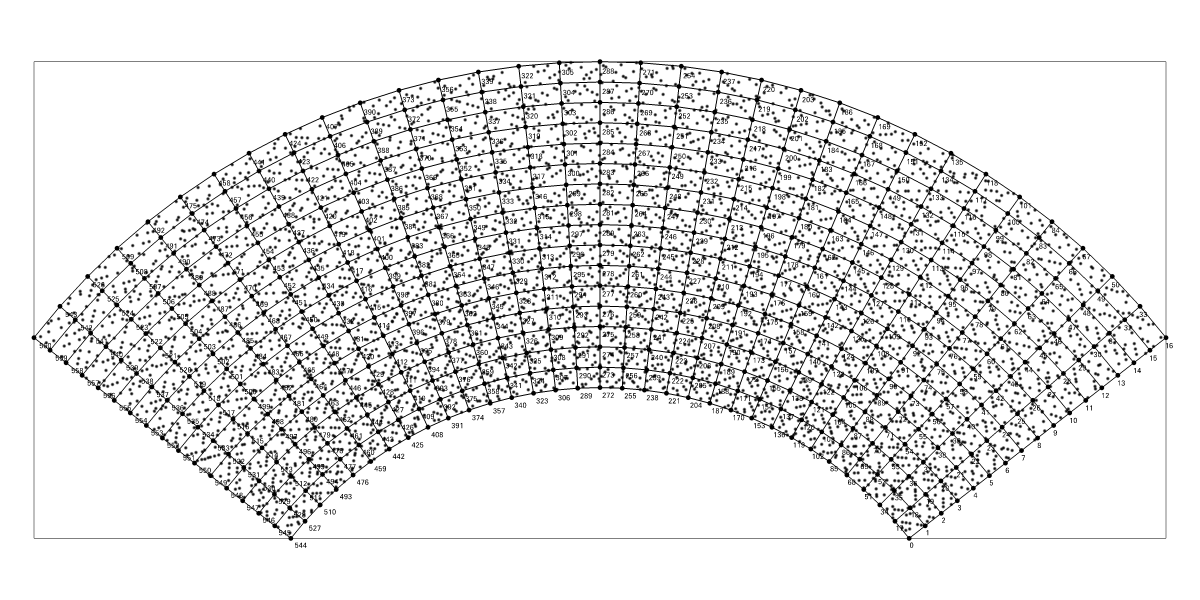

In [147]:
store=None
fig = glucifer.Figure(store=store,figsize=(1200,600))
fig.append( glucifer.objects.Mesh( mesh ,nodeNumbers=True))
fig.append( glucifer.objects.Points( swarm,pointsize=4))

fig.show()

In [140]:
# vField.data[cEdge.data] = (0.,0.,0.)
# vBC = uw.conditions.RotatedDirichletCondition( variable=vField,
#                                                    indexSetsPerDof=(inner+outer,E+W+cEdge,NS0+cEdge),
#                                                    basis_vectors = (mesh._e1, mesh._e2, mesh._e3) )

In [137]:
(swarm.data[:,1]).max()-(swarm.data[:,1]).min()

1.6770437720588975

In [72]:
mesh.specialSets.keys()

dict_keys(['inner', 'Empty', 'surfaces_e2_normal_VertexSet', 'MaxJ_VertexSet', 'MinJ_VertexSet', 'upper_surface_VertexSet', 'surfaces_e1_normal_VertexSet', 'outer', 'Right_VertexSet', 'MinI_VertexSet', 'AllWalls_VertexSet', 'excluded_VertexSet', 'Left_VertexSet', 'MaxI_VertexSet', 'vertical_surfaces_VertexSet', 'surfaces_e3_normal_VertexSet', 'lower_surface_VertexSet', 'Top_VertexSet', 'Bottom_VertexSet'])

In [64]:
!ls

00_a		       ducbY.pdf	       pr.png
4x12_8-00175_hiSpEta   ducbY.svg	       pressure-1.h5
DETA.pdf	       e0ANBuw_sing_job.sh     pressure-1.xdmf
DETA_30_TR_CoN.svg     e0uw_sing_job.sh        prnb2.png
DINDNBTRSP.svg	       e1uw_sing_job.sh        s.png
DrhoCC.pdf	       e2uw_sing_job.sh        scaling
DrhoCC.svg	       errorband_lineplots.py  shortuw_sing_job.sh
DrhoTRSP.pdf	       iea2D-l.py	       swarm-1.h5
DrhoTRSP.svg	       iea2D.py		       tea
EXPSET-e	       iea2DEX.py	       tea2
Figure_1.png	       iea2DEXAn.py	       tea2_NU
Figure_2.png	       iea2DEX_SA.py	       tea2_NU_SA_F
LR_DrhoLM00_a_indNB    iea2DEXq2p1.py	       tea2_NU_TX
LRiea2D_e0aNB.py       iea2D_e0.py	       tr.png
Notebooks	       iea2D_e0aNB.py	       tracerPP
REF_TESTS	       iea2D_e0a_pp.py	       tracer_post_process.py
RRRRuwTimer.log        iea2D_e1.py	       tts
SET_e_TracerPorcessed  iea2D_e2.py	       tvd.pdf
SR.PNG		       iea2Da.py	       uwTimer.log
Stress.png	       kinematics.py	       uw_sin

In [65]:
!mkdir ann

In [66]:
ls

00_a@                   df.csv                  plots.py
4x12_8-00175_hiSpEta/   ducbY.pdf               pr.png
DETA.pdf                ducbY.svg               pressure-1.h5
DETA_30_TR_CoN.svg      e0ANBuw_sing_job.sh     pressure-1.xdmf
DINDNBTRSP.svg          e0uw_sing_job.sh        prnb2.png
DrhoCC.pdf              e1uw_sing_job.sh        s.png
DrhoCC.svg              e2uw_sing_job.sh        scaling/
DrhoTRSP.pdf            errorband_lineplots.py  shortuw_sing_job.sh
DrhoTRSP.svg            iea2D-l.py              swarm-1.h5
EXPSET-e/               iea2D.py                tea/
Figure_1.png            iea2DEX.py              tea2/
Figure_2.png            iea2DEXAn.py            tea2_NU/
LR_DrhoLM00_a_indNB/    iea2DEX_SA.py           tea2_NU_SA_F/
LRiea2D_e0aNB.py        iea2DEXq2p1.py          tea2_NU_TX/
Notebooks/              iea2D_e0.py             tr.png
REF_TESTS/              iea2D_e0aNB.py          tracerPP/
RRRRuwTimer.log         iea2D_e0a_pp.py         tracer_post_process

In [67]:
cd ann

/workspace/my_data/ann


In [104]:
(180-ThetaRAD.magnitude)/2

38.001224745778998

In [151]:
mesh.unitvec_r_Fn.evaluate([1.,0.])

array([[ 1.,  0.]])

In [152]:
mesh.unit_heightFn?

In [154]:
mesh.unitvec_theta_Fn??